In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itk
from itkwidgets import view
import SimpleITK as sitk
from skimage import img_as_ubyte
from skimage.io import imread, imsave, imshow
import math

In [18]:
input_skeleton = r"D:\Cecile\Results\Stade2_ancienmicro\P185AVECAD_carie\Skel_Resampling2_Otsu_tubeness7 of Median5_Edge_Crop_P18-5A-VECAD CARIE STADE2_corne carie gauche_-2.tif"
skeleton_itk = itk.imread(input_skeleton)
print(skeleton_itk)
#input_test = r"D:\Cecile\Test_orientation\test_ori.tif"
#input_test = r"D:\Cecile\Results\Stade 1\large image\skel_cap_tubeness of P24 B STD1 VECAD SMA LARGE IMAGE SMA-4.tif"
#test_itk = itk.imread(input_test)

Image (000001E0B2C7E3C0)
  RTTI typeinfo:   class itk::Image<unsigned short,3>
  Reference Count: 1
  Modified Time: 1166
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 983
  UpdateMTime: 1165
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [1024, 1024, 59]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [1024, 1024, 59]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [1024, 1024, 59]
  Spacing: [1, 1, 1]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1 0 0
0 1 0
0 0 1

  PointToIndexMatrix: 
1 0 0
0 1 0
0 0 1

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (000001E0AEBFF9E0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,unsigned short>
      Reference Count: 1
      

In [19]:
size = itk.size(skeleton_itk)
width = size[0]
height = size[1]
slices = size[2]
print(width, height, slices)

1024 1024 59


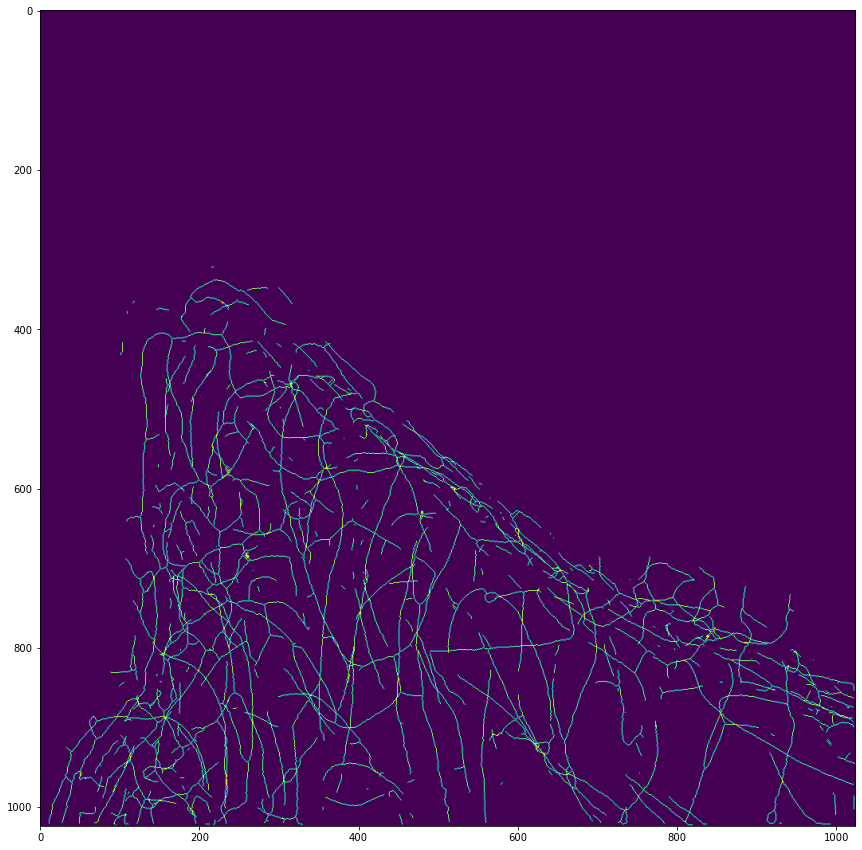

In [20]:
proj_skeleton = itk.maximum_projection_image_filter(skeleton_itk)
#print(proj_skeleton)
np_view_skeleton = itk.array_view_from_image(proj_skeleton)
# print(np_view_skeleton)

plt.figure(figsize=(15,15))
plt.imshow(np_view_skeleton[0])
plt.show()

In [21]:
array_skel = itk.array_view_from_image(skeleton_itk).astype('uint8')
print(array_skel.shape, array_skel)
skeleton_itk_uint8 = itk.image_from_array(array_skel)
print(skeleton_itk_uint8)
skeleton_itk.Set

(59, 1024, 1024) [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Image (000001E0B2C79D70)
  RTTI typeinfo:   class itk::Image<unsigned char,3>
  Reference Count: 1
  Modified Time: 369
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name

AttributeError: 'itkImageUS3' object has no attribute 'Set'

In [17]:
hess_matrix = itk.HessianRecursiveGaussianImageFilter(array_skel, sigma=2)

TemplateTypeError: itk.HessianRecursiveGaussianImageFilter is not wrapped for input type `None`.

To limit the size of the package, only a limited number of
types are available in ITK Python. To print the supported
types, run the following command in your python environment:

    itk.HessianRecursiveGaussianImageFilter.GetTypes()

Possible solutions:
* If you are an application user:
** Convert your input image into a supported format (see below).
** Contact developer to report the issue.
* If you are an application developer, force input images to be
loaded in a supported pixel type.

    e.g.: instance = itk.HessianRecursiveGaussianImageFilter[itk.Image[itk.SS,2]].New(my_input)

* (Advanced) If you are an application developer, build ITK Python yourself and
turned to `ON` the corresponding CMake option to wrap the pixel type or image
dimension you need. When configuring ITK with CMake, you can set
`ITK_WRAP_${type}` (replace ${type} with appropriate pixel type such as
`double`). If you need to support images with 4 or 5 dimensions, you can add
these dimensions to the list of dimensions in the CMake variable
`ITK_WRAP_IMAGE_DIMS`.

Supported input types:

itk.Image[itk.SS,2]
itk.Image[itk.SS,3]
itk.Image[itk.SS,4]
itk.Image[itk.UC,2]
itk.Image[itk.UC,3]
itk.Image[itk.UC,4]
itk.Image[itk.US,2]
itk.Image[itk.US,3]
itk.Image[itk.US,4]
itk.Image[itk.F,2]
itk.Image[itk.F,3]
itk.Image[itk.F,4]
itk.Image[itk.D,2]
itk.Image[itk.D,3]
itk.Image[itk.D,4]


In [26]:
hess_matrix_5 = itk.HessianRecursiveGaussianImageFilter(skeleton_itk, sigma=7)

RuntimeError: C:\P\IPP\ITK-source\ITK\Modules\Core\Common\include\itkImportImageContainer.hxx:192:
Failed to allocate memory for image.

In [22]:
hess_matrix_4 = itk.HessianRecursiveGaussianImageFilter(skeleton_itk, sigma=5)

In [ ]:
#print(hess_matrix)

In [ ]:
# #image=hess_matrix.GetOutput()
# t = hess_matrix.GetPixel([200,200])
# #print("%f,%f,%f,%f"%(t[0],t[1],t[2],t[3]))
# # print("%f,%f,%f,%f,%f,%f"%(t(0,0),t(0,1),t(0,2),t(1,1),t(1,2),t(2,2)))

# # size=hess_matrix.GetOutput().GetBufferedRegion().GetSize()
# # print("%d,%d,%d"%(size[0],size[1],size[2]))

# v=itk.FixedArray[itk.D,2]()
# e=itk.Matrix[itk.D,2,2]()
# t.ComputeEigenAnalysis(v,e)
# print("%f,%f"%(v[0],v[1]))
# arr=itk.GetArrayFromVnlMatrix(e.GetVnlMatrix().as_matrix())
# print(arr)


In [ ]:
array_test = itk.array_view_from_image(skeleton_itk)

#Faire le produit scalaire pour chaque point entre le vecteur propre associé à la valeur propre la plus petite et vecteur 
#unitaire qui lie le point à la caire

carie_x = 894
carie_y = 130
carie_z = 213 

angles = []
dists = []

for y in range(height):
    for x in range(width):
        for z in range(slices):
            test_intensity = array_test[z,y,x]
            if test_intensity != 0:
                print(z,x,y)
                diff_cariex = carie_x - x
                diff_cariey = carie_y - y
                diff_cariez = carie_z - z
                diff_pointx = x - carie_x
                diff_pointy = y - carie_y
                diff_pointz = z - carie_z
                print("diff:", diff_cariex,diff_cariey)
                dist = math.sqrt((diff_cariex)**2+(diff_cariey)**2+(diff_cariez)**2)
                print("dist:", dist)
                v_carie = [diff_cariex/dist, diff_cariey/dist, diff_cariez/dist]
                v_point = [diff_pointx/dist, diff_pointy/dist, diff_pointz/dist]
                print("vector carie:", v_carie)
                t = hess_matrix.GetPixel([x,y,z])
                #array_t= itk.array_view_from_vnl_vector(t)
                #print(t[0], t[1], t[2])
                v=itk.FixedArray[itk.D,3]()
                e=itk.Matrix[itk.D,3,3]()
                t.ComputeEigenAnalysis(v,e)
                print("%f,%f,%f"%(v[0],v[1], v[2]))
                arr=itk.GetArrayFromVnlMatrix(e.GetVnlMatrix().as_matrix())
                #print(arr)
                print("eigenvector 1:", arr[1])
                dot = np.dot(v_carie, arr[1])
                print(dot)
                angle = (math.acos(dot)*360)/(2*math.pi)
                if angle > 90:
#                     dot = np.dot(v_point, arr[1])
#                     angle = (math.acos(dot)*360)/(2*math.pi)
                    angle = 180 - angle
                    print("new dot:", dot, "new angle:", angle)
                print("angle:", angle)
                angles.append(angle)
                #print("angles:", angles)
                dists.append(dist)
                
print(len(angles), len(dists))



In [ ]:
angles_4 = []
dists_4 = []

for y in range(height):
    for x in range(width):
            test_intensity = array_test[y,x]
            if test_intensity != 0:
                print(x,y)
                diff_cariex = carie_x - x
                diff_cariey = carie_y - y
                diff_pointx = x - carie_x
                diff_pointy = y - carie_y
                print("diff:", diff_cariex,diff_cariey)
                dist = math.sqrt((diff_cariex)**2+(diff_cariey)**2)
                print("dist:", dist)
                v_carie = [diff_cariex/dist, diff_cariey/dist]
                v_point = [diff_pointx/dist, diff_pointy/dist]
                print("vector carie:", v_carie)
                t_4 = hess_matrix_4.GetPixel([x,y])

                #array_t= itk.array_view_from_vnl_vector(t)
                #print(t[0], t[1], t[2])
                v_4=itk.FixedArray[itk.D,2]()
                e_4=itk.Matrix[itk.D,2,2]()
                t_4.ComputeEigenAnalysis(v_4,e_4)
                print("%f,%f"%(v_4[0],v_4[1]))
                arr_4=itk.GetArrayFromVnlMatrix(e_4.GetVnlMatrix().as_matrix())
                #print(arr)
                print("eigenvector 1:", arr_4[1])
                dot = np.dot(v_carie, arr_4[1])
                print(dot)
                angle = (math.acos(dot)*360)/(2*math.pi)
                if angle > 90:
                    dot = np.dot(v_point, arr_4[1])
                    angle = (math.acos(dot)*360)/(2*math.pi)
                    print("new dot:", dot, "new angle:", angle)
                print("angle:", angle)
                angles_4.append(angle)
                #print("angles:", angles)
                dists_4.append(dist)
                
print(len(angles_4), len(dists_4))                

In [ ]:
angles_5 = []
dists_5 = []

for y in range(height):
    for x in range(width):
            test_intensity = array_test[y,x]
            if test_intensity != 0:
                print(x,y)
                diff_cariex = carie_x - x
                diff_cariey = carie_y - y
                diff_pointx = x - carie_x
                diff_pointy = y - carie_y
                print("diff:", diff_cariex,diff_cariey)
                dist = math.sqrt((diff_cariex)**2+(diff_cariey)**2)
                print("dist:", dist)
                v_carie = [diff_cariex/dist, diff_cariey/dist]
                v_point = [diff_pointx/dist, diff_pointy/dist]
                print("vector carie:", v_carie)
                t_5 = hess_matrix_5.GetPixel([x,y])

                #array_t= itk.array_view_from_vnl_vector(t)
                #print(t[0], t[1], t[2])
                v_5=itk.FixedArray[itk.D,2]()
                e_5=itk.Matrix[itk.D,2,2]()
                t_5.ComputeEigenAnalysis(v_5,e_5)
                print("%f,%f"%(v_5[0],v_5[1]))
                arr_5=itk.GetArrayFromVnlMatrix(e_5.GetVnlMatrix().as_matrix())
                #print(arr)
                print("eigenvector 1:", arr_5[1])
                dot = np.dot(v_carie, arr_5[1])
                print(dot)
                angle = (math.acos(dot)*360)/(2*math.pi)
                if angle > 90:
                    dot = np.dot(v_point, arr_5[1])
                    angle = (math.acos(dot)*360)/(2*math.pi)
                    print("new dot:", dot, "new angle:", angle)
                print("angle:", angle)
                angles_5.append(angle)
                #print("angles:", angles)
                dists_5.append(dist)
                
print(len(angles_5), len(dists_5))

In [ ]:
array_plot_angles = []
for k in range(len(angles)):
    array_plot_angles.append([dists[k],angles[k]])
array_plot_angles.sort()
#print("Angles sorted:",array_plot_angles)

# array_plot_angles_4 = []
# for k in range(len(angles_4)):
#     array_plot_angles_4.append([dists_4[k],angles_4[k]])
# array_plot_angles_4.sort()

# array_plot_angles_5 = []
# for k in range(len(angles_5)):
#     array_plot_angles_5.append([dists_5[k],angles_5[k]])
# array_plot_angles_5.sort()

In [ ]:
dist_sorted = []
angles_sorted = []

for k in range(len(array_plot_angles)):
    dist_sorted.append(array_plot_angles[k][0])
    angles_sorted.append(array_plot_angles[k][1])
print(len(dist_sorted))
#print("dist", dist_sorted, "diam", angles_sorted, "longueur dist", len(dist_sorted), "longueur diam", len(angles_sorted))

# dist_sorted_4 = []
# angles_sorted_4 = []

# for k in range(len(array_plot_angles_4)):
#     dist_sorted_4.append(array_plot_angles_4[k][0])
#     angles_sorted_4.append(array_plot_angles_4[k][1])
# print(len(dist_sorted_4))

# dist_sorted_5 = []
# angles_sorted_5 = []

# for k in range(len(array_plot_angles_5)):
#     dist_sorted_5.append(array_plot_angles_5[k][0])
#     angles_sorted_5.append(array_plot_angles_5[k][1])
# print(len(dist_sorted_5))

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.plot(dist_sorted, angles_sorted)
plt.title("Sigma = 2")
plt.xlabel("Distance with the decay location")
plt.ylabel("Angles")
# plt.subplot(1,3,2)
# plt.plot(dist_sorted_4, angles_sorted_4)
# plt.title("Sigma = 5")
# plt.xlabel("Distance with the decay location")
# plt.ylabel("Angles")
# plt.subplot(1,3,3)
# plt.plot(dist_sorted_5, angles_sorted_5)
# plt.title("Sigma = 7")
# plt.xlabel("Distance with the decay location")
# plt.ylabel("Angles")
plt.show()